<a href="https://colab.research.google.com/github/mezkymy/ecommerce-ds/blob/pipeline/Final_Project_DS_Rakamin_Batch_31_Kelompok_4_(Cobra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# initialize random state
random_state = 25

# set plot style for whole notebook
sns.set_style('darkgrid')

In [3]:
# load csv file, create raw data (original copy) and dataframe (df) to manipulate
raw_data = pd.read_csv('Train.csv')
df = raw_data.copy()
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1. Data Exploration

Source: [E-Commerce Shipping Data from Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics)

## Context (copied from Kaggle):
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## 1.1 Descriptive Statistics Analysis

In [4]:
# check columns and null/non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<b>Tidak ada kolom yang terdeteksi memiliki null value.</b>

In [5]:
# check if any ID is duplicated
df[df['ID'].duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


<b>Tidak ada ID duplikat terdeteksi.</b>

Kolom ID dapat di-drop karena tidak akan digunakan pada tahapan selanjutnya.

In [6]:
# drop ID column
df.drop('ID', axis=1, inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
# descriptive statistics for numerical values
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Terdapat sebuah kejanggalan pada feature `Discount_offered`, dimana nilai maksimalnya sebesar 65 sedangkan selisih jaraknya dengan Q3 (10) atau mean (13) sangat tinggi, sehingga diduga terdapat beberapa outlier/pencilan data yang mungkin perlu ditangani

In [8]:
# descriptive for categorical columns
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Tidak terdapat kejanggalan pada Categorical Data karena setiap kolom memiliki jumlah data yang sama dengan jumlah total baris data dan tidak terdapat nilai yang tidak diharapkan seperti huruf atau karakter yang dianggap sebagai kejanggalan.

## 1.2 Univariate Analysis


### 1.2.1 Pemeriksaan Rasio Data Target

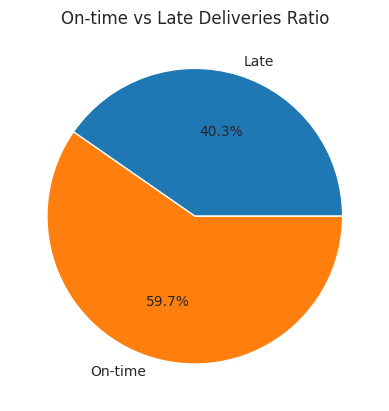

In [9]:
# check ratio of on-time vs late deliveries
df.groupby('Reached.on.Time_Y.N').size().plot(kind='pie', labels=['Late', 'On-time'], autopct='%.1f%%')

plt.title('On-time vs Late Deliveries Ratio')
plt.show()

Melalui grafik di atas, dapat diketahui bahwa proporsi pengiriman yang tepat waktu (On-time) sebesar 59,7% dan proporsi pengiriman yang terlambat (Late) sebesar 40,3%. Dapat disimpulkan bahwa sebagian besar pengiriman dilakukan tepat waktu, namun masih ada sebagian kecil pengiriman yang terlambat. Hal ini dapat menjadi fokus perbaikan untuk meningkatkan kualitas layanan dan kepuasan pelanggan.

Karena data sudah memiliki jumlah sampel yang cukup banyak dan tidak terlalu berbeda antara kelas satu dengan yang lain (tidak terlalu signifikan class imbalance-nya), maka tidak perlu dilakukan penyeimbangan lebih lanjut terhadap pada tahap pre-processing data.

### 1.2.2. Pemeriksaan Sebaran Data untuk Tiap Fitur/Variabel

In [10]:
# function to calculate bins based on Freedman-Diaconis (not used for now)
def bins_fd(col):
    n = col.count()
    q1, q3 = col.quantile([0.25, 0.75])
    range_tc = col.max() - col.min()
    IQR = q3 - q1
    return int(round(np.ceil(((n ** (1/3)) * range_tc)/(2 * IQR)), 0))

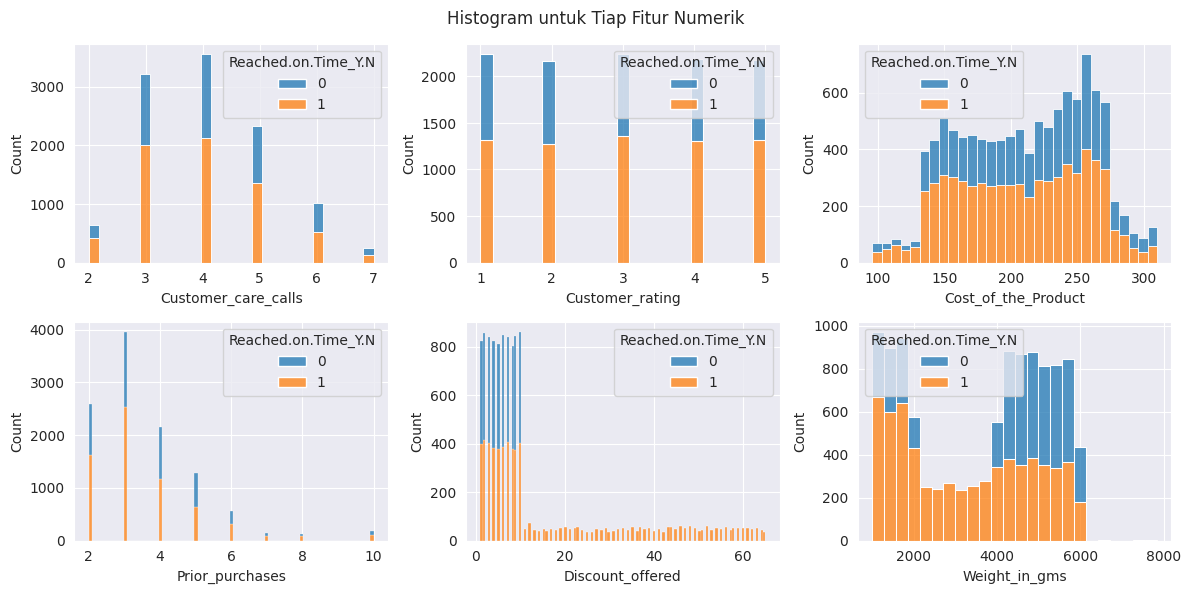

In [11]:
# histogram for numeric columns
numeric_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

plt.suptitle('Histogram untuk Tiap Fitur Numerik')

i = 0
for y in axes:
    for ax in y:
        column = numeric_columns[i]
        sns.histplot(df, x=column, hue='Reached.on.Time_Y.N', multiple='stack', ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

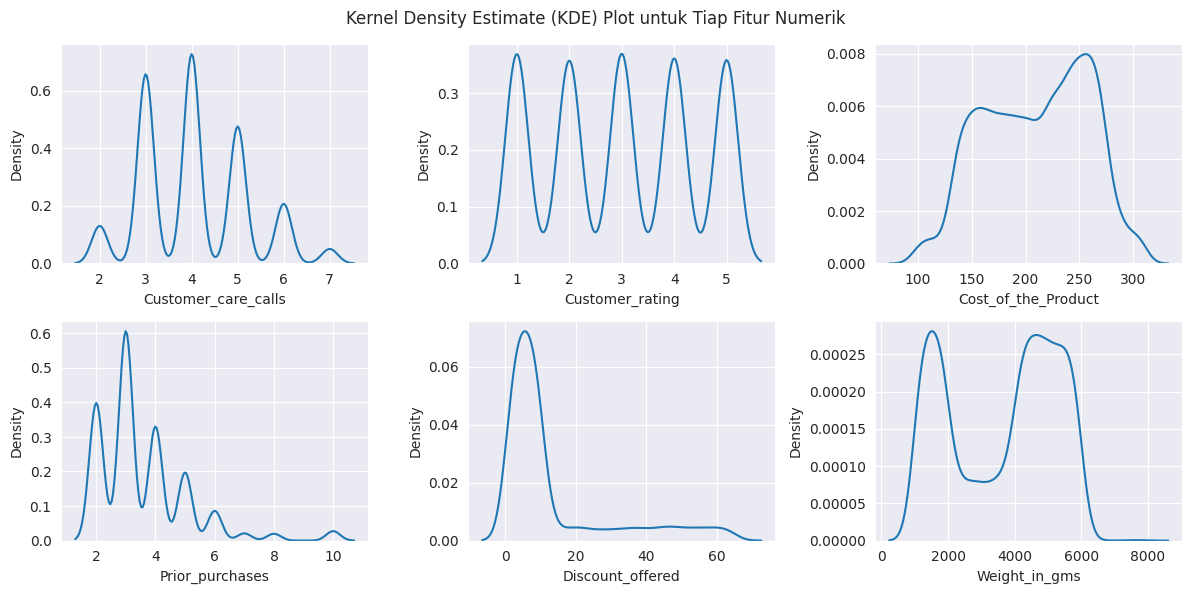

In [12]:
# KDEplot for numeric columns (sebagai pembanding tampilan)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

plt.suptitle('Kernel Density Estimate (KDE) Plot untuk Tiap Fitur Numerik')

i = 0
for y in axes:
    for ax in y:
        column = numeric_columns[i]
        sns.kdeplot(df, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

Pada grafik sebaran fitur numerik terdapat beberapa hal yang menarik, diantaranya yaitu:

- Sebaran data berdasarkan fitur `Prior_purchase` membentuk positive skew
- Pada sebaran data berdasarkan fitur `Weight_in_gms` terdapat beberapa outlier pada nilai diatas 6000 (tidak terlalu terlihat pada grafik)
- Pada sebaran data berdasarkan fitur `Discount_offered`, terdapat nilai yang mendominasi yaitu pada nilai 0 - 10%, dimana barang yang diberikan <b>diskon di luar range tersebut tidak ada satupun yang terlambat</b>


Saat data pre-processing, perlu dilakukan scaling/standarisasi pada data numerik agar mempunyai range yang seragam.

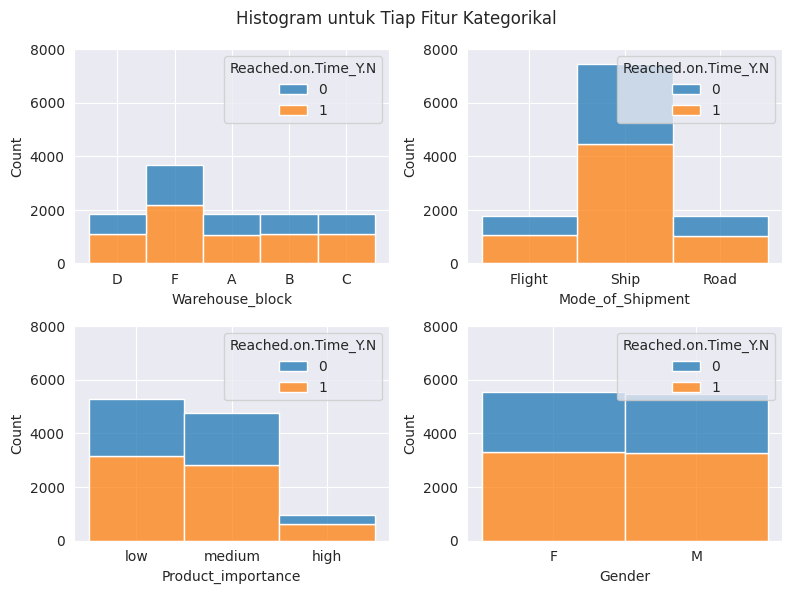

In [13]:
# Create histplot for categorical columns
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

plt.suptitle('Histogram untuk Tiap Fitur Kategorikal')

i = 0
for y in axes:
    for ax in y:
        column = categorical_columns[i]
        sns.histplot(df, x=column, hue='Reached.on.Time_Y.N', multiple='stack', ax=ax) 
        ax.set_ylim(0, 8000)
        i += 1

fig.tight_layout(pad=1)
plt.show()

Insight Histogram Fitur Kategorikal:

- Berdasarkan Warehouse, barang paling banyak disimpan/dilayani oleh Warehouse F, sedangkan warehouse lainnya kurang lebih menampung jumlah barang yang sama
- Mayoritas pengiriman dilakukan melalui jalur laut (Ship)
- Jumlah barang yang tingkat kepentingannya tinggi (high) relatif sedikit
- Jumlah customer pria hampir setara dengan jumlah customer wanita, dengan rasio keterlambatan yang juga serupa
- Beberapa hal yang perlu ditindaklanjuti pada saat data pre-processing:
  - Untuk kolom `Gender`, dapat dilakukan mapping agar nilai "M" dan "F" menjadi 0 dan 1.
  - Untuk kolom `Product_importance`, dapat dilakukan label encoding karena kedua kolom tersebut memiliki nilai-nilai yang berurutan dan memiliki hubungan ordinal antara nilai-nilainya.
  - Untuk kolom `Warehouse_block` dan `Mode_of_Shipment`, dapat dilakukan one-hot encoding karena kolom tersebut tidak memiliki hubungan ordinal antara nilai-nilainya dan setiap nilai kategorikal dianggap sama pentingnya.




## 1.3 Multivariate Analysis

In [14]:
# # ONLY UNCOMMENT AND RUN THIS CELL IF NECESSARY TO SHOW PAIR PLOT. CELL TAKES A LONG TIME TO EXECUTE

# # create pairplot for all numerical features
# sns.pairplot(df, hue='Reached.on.Time_Y.N')
# plt.show()

Terdapat segmentasi data yang secara visual cukup jelas terlihat pada beberapa pair plot. Secara visual, dapat diambil beberapa insight sebagai berikut:
- Pada `Discount_offered` terhadap `Weight_in_gms`, pada umumnya barang-barang yang beratnya di atas 4000 gram tidak diberikan diskon lebih besar dari 10% (kecuali untuk beberapa outlier).
- Tidak ditemukan barang terlambat pada barang yang diberikan diskon lebih dari 10%
- Barang dengan berat di antara 2000-4000 gram harganya ada di kisaran ~200 sampai ~300 dollar, dan tidak ada yang terlambat pengirimannya
- Terdapat beberapa data outlier jika dilihat berdasarkan berat barang (`Weight_in_gms`), yaitu barang-barang yang beratnya melebihi 6000 gram, namun untuk barang-barang tersebut tidak ada satupun yang mengalami keterlambatan

Berdasarkan hasil korelasi antara fitur, terdapat beberapa hal yang perlu dilakukan, yaitu:
- Beberapa data outlier pada berat barang (`Weight_in_gms`) yang perlu diobservasi lebih lanjut untuk memastikan apakah data tersebut valid atau tidak. Jika data tersebut valid, maka dapat dipertimbangkan untuk menggunakan teknik pre-processing seperti pengurangan dimensi (PCA) atau penanganan outlier untuk memperbaiki performa model.


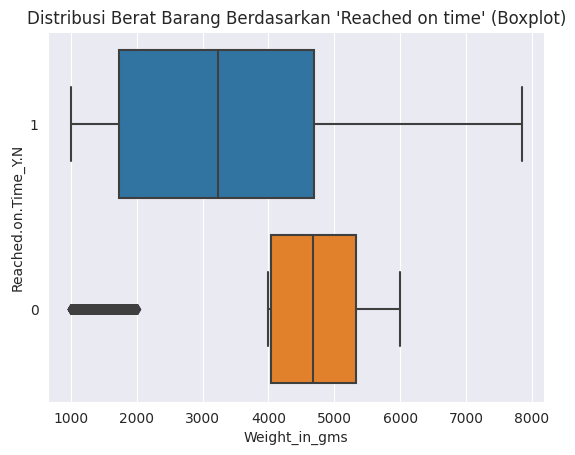

In [15]:
# check distribution of item weight based on 'reached on time'
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Weight_in_gms", y="Reached.on.Time_Y.N").set(title="Distribusi Berat Barang Berdasarkan 'Reached on time' (Boxplot)")

plt.minorticks_on()
plt.show()

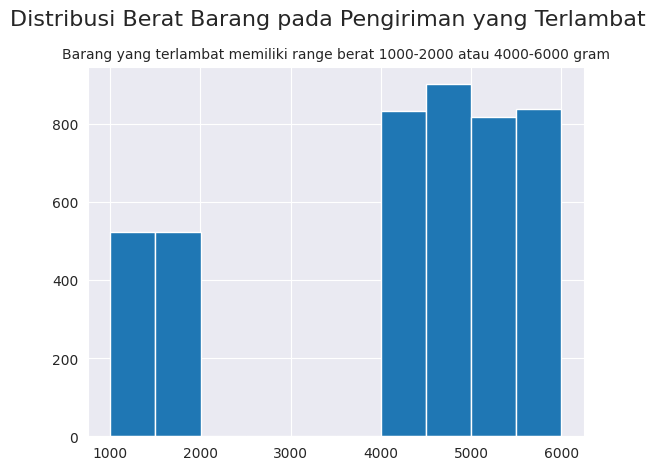

In [16]:
# create weight histplot for late deliveries
df[df['Reached.on.Time_Y.N'] == 0].hist(column = "Weight_in_gms")

plt.suptitle('Distribusi Berat Barang pada Pengiriman yang Terlambat', y=1, fontsize=16)
plt.title('Barang yang terlambat memiliki range berat 1000-2000 atau 4000-6000 gram', fontsize=10)
plt.show()

Berdasarkan data yang dimiliki, keterlambatan hanya terjadi pada barang yang memiliki berat di antara 1000-2000 gram atau 4000-6000 gram. Untuk barang yang memiliki berat 2000-4000 gram atau diatas 6000 gram tidak ada satupun yang mengalami keterlambatan pengiriman.

Pemeriksaan lebih lanjut dapat dilakukan terhadap barang yang berada pada rentang-rentang tersebut untuk dapat meneliti lebih lanjut pengaruh berat barang terhadap keterlambatan pengiriman.

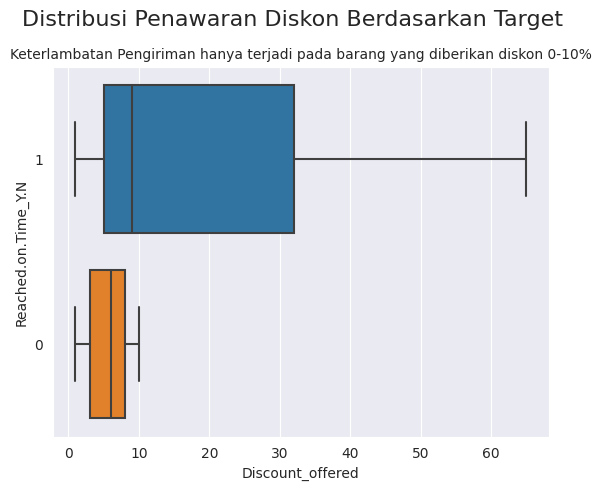

In [17]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Discount_offered", y='Reached.on.Time_Y.N')

plt.suptitle('Distribusi Penawaran Diskon Berdasarkan Target', y=1, fontsize=16)
plt.title('Keterlambatan Pengiriman hanya terjadi pada barang yang diberikan diskon 0-10%', fontsize=10)
plt.show()

Berdasarkan data yang dimiliki, keterlambatan hanya terjadi pada barang yang diberikan diskon 0 sampai 10 persen, sedangkan pada barang yang dieberikan diskon diatas 10 persen tidak ada satupun yang terlambat. Sebuah kategori dapat dibentuk untuk memisahkan barang berdasarkan jumlah diskon yang ditawarkan.

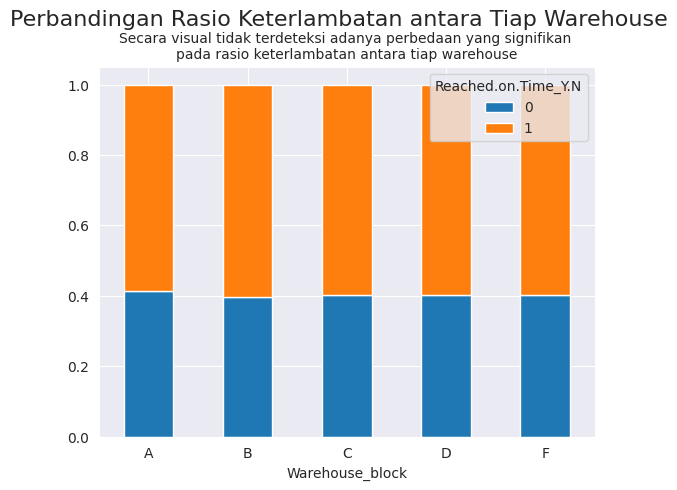

In [18]:
ct = pd.crosstab(index=df['Warehouse_block'],columns=df['Reached.on.Time_Y.N'], normalize='index')

ct.plot(kind='bar', rot=0, stacked=True)

plt.suptitle('Perbandingan Rasio Keterlambatan antara Tiap Warehouse', y=1, fontsize=16)
plt.title(f'Secara visual tidak terdeteksi adanya perbedaan yang signifikan \npada rasio keterlambatan antara tiap warehouse', fontsize=10)
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa tidak ada perbedaan signifikan antara rasio keterlambatan barang pada tiap Warehouse.

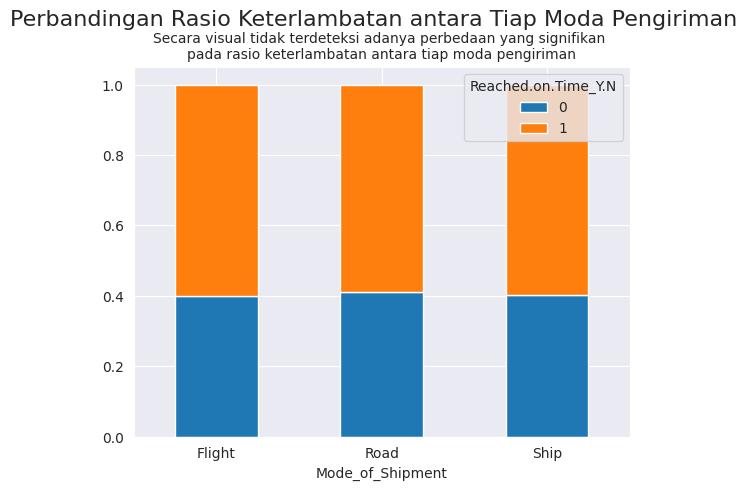

In [19]:
ct = pd.crosstab(index=df['Mode_of_Shipment'],columns=df['Reached.on.Time_Y.N'], normalize='index')

ct.plot(kind='bar', rot=0, stacked=True)

plt.suptitle('Perbandingan Rasio Keterlambatan antara Tiap Moda Pengiriman', y=1, fontsize=16)
plt.title(f'Secara visual tidak terdeteksi adanya perbedaan yang signifikan \npada rasio keterlambatan antara tiap moda pengiriman', fontsize=10)

plt.show()

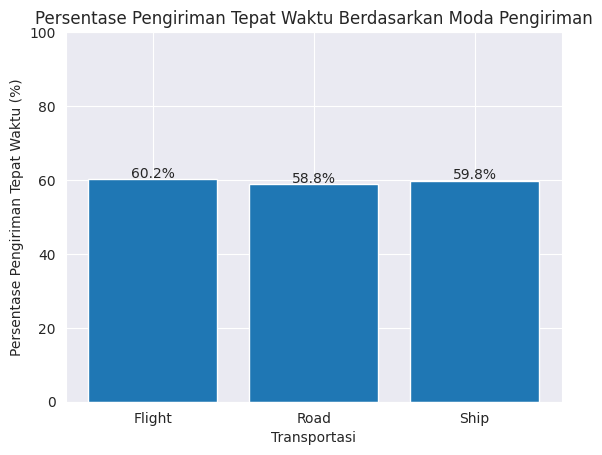

In [20]:
# Calculate late delivery percentage for each mode of transport
delay_by_shipment = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean() * 100

# Membuat bar plot
plt.bar(delay_by_shipment.index, delay_by_shipment.values)

# Menambahkan label untuk setiap bar
for i, v in enumerate(delay_by_shipment.values):
    plt.text(i, v+0.5, str(round(v,1)) + '%', ha='center')

# Menambahkan label pada sumbu x dan y, serta judul grafik
plt.title('Persentase Pengiriman Tepat Waktu Berdasarkan Moda Pengiriman')
plt.xlabel('Transportasi')
plt.ylabel('Persentase Pengiriman Tepat Waktu (%)')
plt.ylim(0, 100)

# Menampilkan grafik
plt.show()

Berdasarkan dua grafik di atas terkait moda pengiriman barang, dapat disimpulkan bahwa rata-rata persentase atau rasio barang yang pengirimannya terlambat dan tepat waktu untuk setiap moda transportasi tidak jauh berbeda.

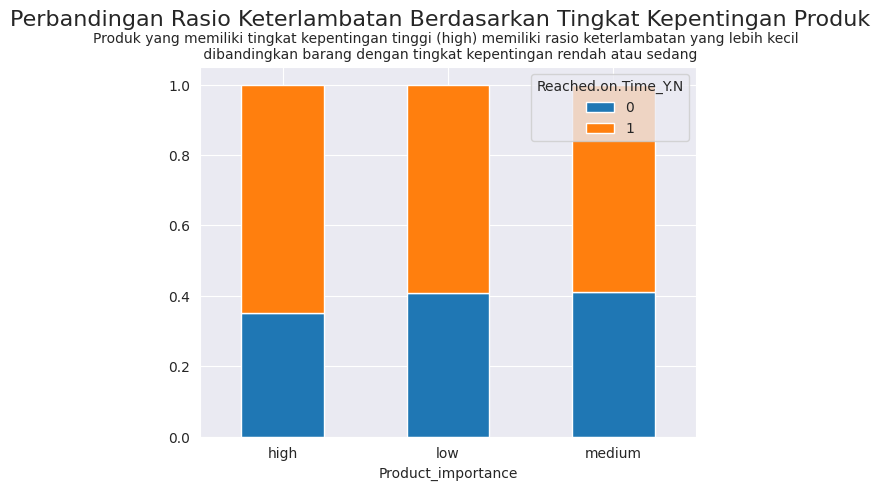

In [21]:
ct = pd.crosstab(index=df['Product_importance'],columns=df['Reached.on.Time_Y.N'], normalize='index')

ct.plot(kind='bar', rot=0, stacked=True)

plt.suptitle('Perbandingan Rasio Keterlambatan Berdasarkan Tingkat Kepentingan Produk', y=1, fontsize=16)
plt.title(f'Produk yang memiliki tingkat kepentingan tinggi (high) memiliki rasio keterlambatan yang lebih kecil \n dibandingkan barang dengan tingkat kepentingan rendah atau sedang', fontsize=10)

plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa untuk barang yang tingkat kepentingannya tinggi (high) relatif lebih jarang terlambat dibandingkan yang tingkat kepentingannya rendah (low) maupun sedang (medium), namun dengan besar pengaruh yang tidak terlalu masif.

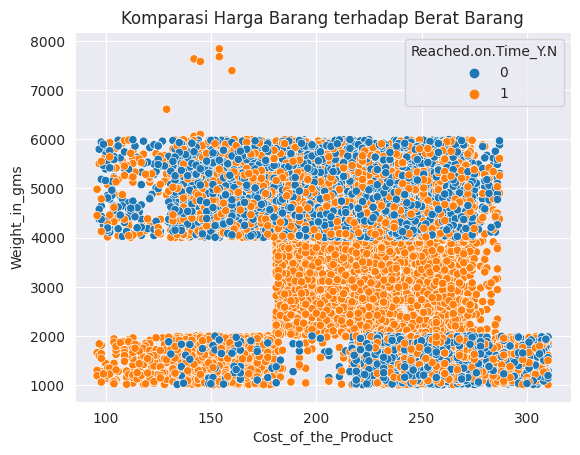

In [22]:
sns.scatterplot(data=df, x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N')

plt.title('Komparasi Harga Barang terhadap Berat Barang')
plt.show()

Berdasarkan perbandingan harga terhadap berat barang, dapat terlihat segmentasi yang cukup jelas terhadap barang-barang pada rentang berat tertentu. Adapun secara manual sudah terlihat cukup jelas bahwa untuk barang pada rentang berat di atas 6000 gram, harga barang berada di sekitar 100-200 dan tidak ada yang terlambat. 

#### Kategorisasi Berat Barang
Adapun untuk melihat hubungan antara berat barang dengan  menambahkan fitur kategori berdasarkan berat barang, dengan rentang sebagai berikut:
1. Berat barang 2000 gram atau lebih ringan, kategori 'light' atau ringan
2. Berat barang di antara 2000 - 4000 gram, kategori 'medium' atau sedang
3. Berat barang di antara 4000 - 6000 gram (inklusif), kategori 'heavy' atau berat
4. Berat barang di atas 6000 gram, kategori 'very heavy' atau sangat berat

In [23]:
# categorize weight
cond = [
    (df['Weight_in_gms'] <= 2000),
    (df['Weight_in_gms'] > 2000) & (df['Weight_in_gms'] < 4000),
    (df['Weight_in_gms'] >= 4000) & (df['Weight_in_gms'] <= 6000),
    (df['Weight_in_gms'] > 6000),
]

val = ['light', 'medium', 'heavy', 'very heavy']

df['Weight_cat'] = np.select(cond, val)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_cat
0,D,Flight,4,2,177,3,low,F,44,1233,1,light
1,F,Flight,4,5,216,2,low,M,59,3088,1,medium
2,A,Flight,2,2,183,4,low,M,48,3374,1,medium
3,B,Flight,3,3,176,4,medium,M,10,1177,1,light
4,C,Flight,2,2,184,3,medium,F,46,2484,1,medium


In [24]:
df[df['Weight_cat'] == 'light'].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000
mean,4.626810,2.982435,214.697072,4.043143,16.922034,1494.070262,0.677658
std,1.334022,1.415738,58.632361,1.269722,18.471671,289.271956,0.467445
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,4.000000,2.000000,158.000000,3.000000,4.000000,1240.000000,0.000000
50%,5.000000,3.000000,232.000000,4.000000,8.000000,1498.000000,1.000000
75%,6.000000,4.000000,264.000000,5.000000,26.000000,1744.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,2000.000000,1.000000


In [25]:
df[df['Weight_cat'] == 'medium'].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.0
mean,3.810190,3.003919,227.235162,3.298992,33.055991,3000.471445,1.0
std,0.943993,1.420335,28.710330,1.555390,18.751335,583.497470,0.0
min,2.000000,1.000000,181.000000,2.000000,1.000000,2003.000000,1.0
25%,3.000000,2.000000,202.000000,2.000000,17.000000,2493.000000,1.0
50%,4.000000,3.000000,226.500000,3.000000,34.000000,2994.000000,1.0
75%,4.000000,4.000000,252.000000,4.000000,49.000000,3516.000000,1.0
max,6.000000,5.000000,286.000000,10.000000,65.000000,3997.000000,1.0


In [26]:
df[df['Weight_cat'] == 'heavy'].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,5960.000000,5960.000000,5960.00000,5960.000000,5960.000000,5960.000000,5960.000000
mean,3.818792,2.991275,202.72651,3.389933,5.524832,4984.313926,0.431208
std,0.954784,1.410860,44.56119,1.581473,2.922111,577.855397,0.495287
min,2.000000,1.000000,96.00000,2.000000,1.000000,4000.000000,0.000000
25%,3.000000,2.000000,166.00000,2.000000,3.000000,4486.000000,0.000000
50%,4.000000,3.000000,203.00000,3.000000,6.000000,4966.500000,0.000000
75%,4.000000,4.000000,241.25000,4.000000,8.000000,5487.000000,1.000000
max,6.000000,5.000000,287.00000,10.000000,47.000000,6000.000000,1.000000


In [27]:
df[df['Weight_cat'] == 'very heavy'].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8.0,8.00000,8.000000,8.0,8.0000,8.00000,8.0
mean,2.0,2.75000,146.375000,3.0,26.7500,7117.37500,1.0
std,0.0,1.28174,9.605616,0.0,15.0119,738.82125,0.0
min,2.0,1.00000,129.000000,3.0,5.0000,6064.00000,1.0
25%,2.0,2.00000,142.000000,3.0,18.5000,6486.00000,1.0
50%,2.0,2.50000,145.000000,3.0,27.5000,7494.50000,1.0
75%,2.0,3.25000,154.000000,3.0,38.0000,7651.00000,1.0
max,2.0,5.00000,160.000000,3.0,48.0000,7846.00000,1.0


Dengan pembagian kategori berat seperti di atas, dapat dilihat bahwa untuk kategori berat 'light' dan 'heavy', tidak ada satupun barang yang terlambat, yang dinilai dari nilai rata-rata targetnya yaitu persis di 1.

Untuk rentang harga barang berdasarkan kategori berat adalah sebagai berikut:
1. Kategori berat 'light', harga ada di rentang 96 - 310 atau sama dengan rentang secara keseluruhan (dapat dilihat pada Descriptive Statistic Analysis di poin 1.1)
2. Kategori berat 'medium', harga ada di rentang 181 - 286
3. Kategori berat 'heavy', harga ada di rentang 96 - 287
4. Kategori berat 'very heavy', harga ada di rentang 129 - 160

#### Kategorisasi Harga Barang
Berdasarkan temuan tersebut, harga barang mungkin dapat dikategorisasi juga menjadi:
1. Kategori 'low', dengan harga di bawah 181
2. Kategori 'medium', dengan harga di antara 181 - 287 (inklusif)
3. Kategori 'high', dengan harga di atas 287

In [28]:
# categorize cost
cond = [
    (df['Cost_of_the_Product'] < 181),
    (df['Cost_of_the_Product'] >= 181) & (df['Cost_of_the_Product'] <= 287),
    (df['Cost_of_the_Product'] > 287)
]

val = ['low', 'medium', 'high']

df['Cost_cat'] = np.select(cond, val)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_cat,Cost_cat
0,D,Flight,4,2,177,3,low,F,44,1233,1,light,low
1,F,Flight,4,5,216,2,low,M,59,3088,1,medium,medium
2,A,Flight,2,2,183,4,low,M,48,3374,1,medium,medium
3,B,Flight,3,3,176,4,medium,M,10,1177,1,light,low
4,C,Flight,2,2,184,3,medium,F,46,2484,1,medium,medium


#### Kategorisasi Barang Berdasarkan Diskon yang Ditawarkan
Berdasarkan temuan pada tahap univariate maupun multivariate analysis, barang dapat dikategorisasi lebih lanjut berdasarkan besar diskon yang ditawarkan. Adapun dua kategori besar yang dapat dibuat adalah:
1. Barang yang diberikan diskon lebih kecil atau sama dengan 10%
2. Barang yang diberikan diskon di atas 10%

In [29]:
# categorize discount
df['Disc_above_10'] = np.where(df['Discount_offered'] > 10, 1, 0)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_cat,Cost_cat,Disc_above_10
0,D,Flight,4,2,177,3,low,F,44,1233,1,light,low,1
1,F,Flight,4,5,216,2,low,M,59,3088,1,medium,medium,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,medium,medium,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,light,low,0
4,C,Flight,2,2,184,3,medium,F,46,2484,1,medium,medium,1


In [30]:
df[df['Disc_above_10'] == 1].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Disc_above_10
count,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2647.0,2647.0
mean,3.747639,2.993578,196.196071,3.295807,38.192293,2366.823196,1.0,1.0
std,0.995345,1.419933,45.536872,1.522492,15.931983,918.202782,0.0,0.0
min,2.000000,1.000000,96.000000,2.000000,11.000000,1001.000000,1.0,1.0
25%,3.000000,2.000000,158.000000,2.000000,24.000000,1577.000000,1.0,1.0
50%,4.000000,3.000000,192.000000,3.000000,39.000000,2239.000000,1.0,1.0
75%,4.000000,4.000000,234.000000,4.000000,52.000000,3129.500000,1.0,1.0
max,7.000000,5.000000,296.000000,10.000000,65.000000,7846.000000,1.0,1.0


Seperti yang dapat dilihat bahwa untuk kategori diskon di atas 10 persen (`Disc_above_10` = 1), tidak ada satupun barang yang mengalami keterlambatan (mean untuk target tepat di 1).

Fitur yang dibentuk sudah berbentuk binary sehingga tidak perlu diproses lebih lanjut nantinya.

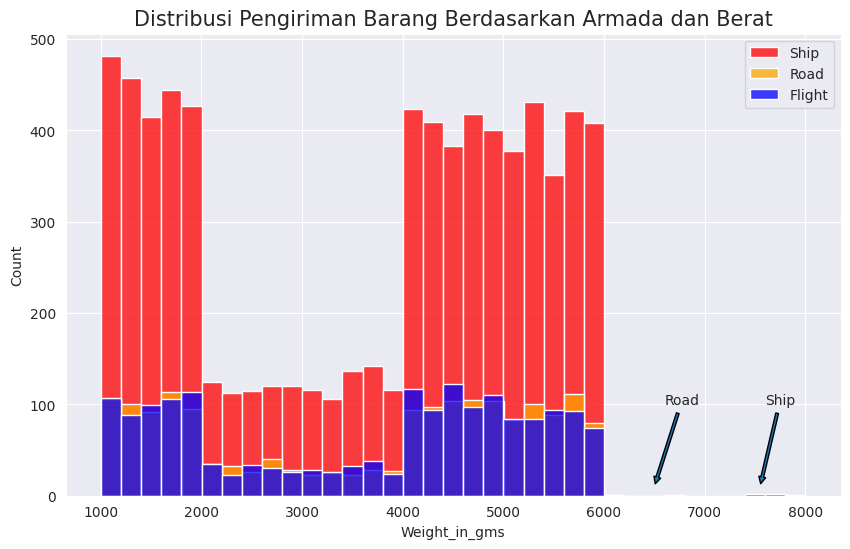

In [31]:
# Filtering Kolom
flight = df[df['Mode_of_Shipment']=='Flight']
ship = df[df['Mode_of_Shipment']=='Ship']
road = df[df['Mode_of_Shipment']=='Road']

# Visualisasi Distribusi Barang
plt.figure(figsize=(10,6))
sns.histplot(x='Weight_in_gms', binwidth=200, color='red', data=ship, label='Ship')
sns.histplot(x='Weight_in_gms', binwidth=200, color='orange', data=road, label='Road')
sns.histplot(x='Weight_in_gms', binwidth=200, color='blue', data=flight, label='Flight')

# Judul
plt.title('Distribusi Pengiriman Barang Berdasarkan Armada dan Berat', fontsize=15)

# Keterangan Tambahan
plt.annotate('Road',
            xy=(6500,10), xytext=(6600, 100), arrowprops=dict(ec='black', arrowstyle='simple',))
plt.annotate('Ship',
            xy=(7550,10), xytext=(7600, 100), arrowprops=dict(ec='black', arrowstyle='simple',))

# Legenda
plt.legend(loc=1)
plt.show()

Terdapat beberapa barang yang memiliki berat di atas 6000 gram, dimana barang yang berada pada rentang 6000-7000 gram hanya dikirimkan melalui jalur darat ('Road'), sedangkan barang yang memiliki berat di atas 7000 gram dikirimkan hanya melalui jalur laut ('Ship').

Barang-barang yang memiliki berat di atas 6000 gram jumlahnya relatif sedikit dan tidak ada satupun yang mengalami keterlambatan.

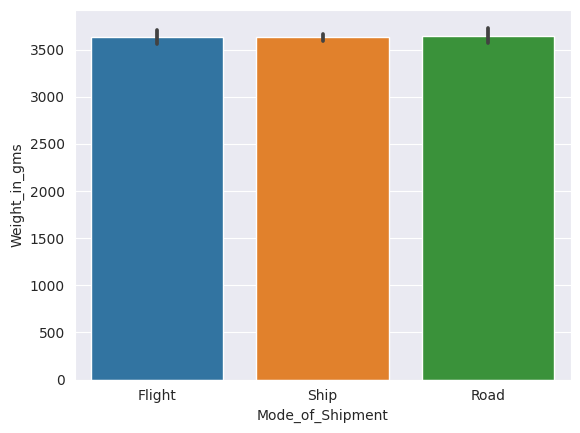

In [32]:
# average weight per mode of shipment
sns.barplot(x='Mode_of_Shipment', y='Weight_in_gms', estimator='mean', data=df)
plt.show()

Pada analisis univariate, sudah terdeteksi bahwa mayoritas pengiriman dilakukan menggunakan jalur laut (moda 'Ship' atau kapal). Namun pada grafik di atas, jika dilihat berdasarkan rata-rata berat pengiriman barang pada tiap moda maka tiap moda memiliki rata-rata berat yang kurang lebih sama.

### Heatmap Korelasi untuk Fitur Numerik

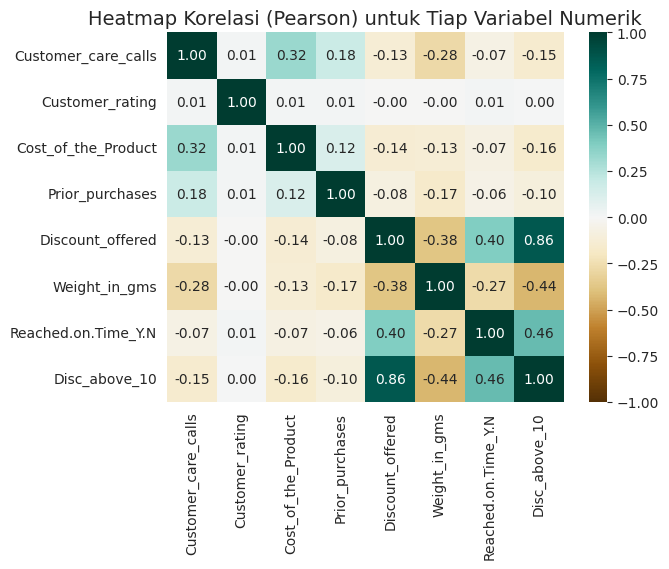

In [33]:
# correlation heatmap with pearson
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2f')

plt.title('Heatmap Korelasi (Pearson) untuk Tiap Variabel Numerik', fontsize=14)
plt.show()

Berdasarkan hasil heatmap yang dibuat korelasi antar fitur beragam dengan range 1 sampai -1. Semakin mendekati 1 atau -1 maka korelasi semakin kuat, sedangkan semakin mendekati 0 maka korelasi semakin lemah. Beberapa nilai korelasi yang paling relevan adalah sebagai berikut:

- `Discount_offered` dengan `Reached.on.Time_Y.N` berkorelasi sedang positif, sedangkan `Weight_in_gms` dengan `Reached.on.Time_Y.N` berkorelasi lemah negatif
- `Discount_offered` dengan `Weight_in_gms` berkorelasi sedang negatif (dapat mengakibatkan multikolinearitas pada model linear)
- `Cost_of_the_Product` dengan `Customer_care_calls` berkorelasi sedang positif
`Customer_rating` memiliki korelasi yang sangat kecil terhadap seluruh fitur lainnya, termasuk keterlambatan pengiriman

Berdasarkan hasil korelasi antar fitur & target, terdapat beberapa hal yang mungkin perlu dilakukan, yaitu:

  - `Discount_offered` dan `Weight_in_gms` memiliki korelasi yang cukup signifikan, sehingga perlu dilakukan pengecekan terhadap adanya multikolinearitas antara kedua fitur tersebut. Jika ditemukan adanya multikolinearitas, salah satu fitur dapat dihapus atau digabungkan dengan fitur lain.
  - Korelasi antara `Cost_of_the_Product` dengan `Customer_care_calls` perlu diperhatikan pada saat modelling. Jika terdapat multikolinearitas, fitur yang memiliki korelasi lebih rendah dengan target (`Reached.on.Time_Y.N`) dapat dihapus atau digabungkan dengan fitur lain.
  - Fitur yang memiliki korelasi rendah dengan target (`Reached.on.Time_Y.N`) namun memiliki korelasi yang tinggi dengan fitur lain juga perlu diperhatikan pada saat modelling. Pada beberapa kasus, fitur tersebut mungkin dapat dihapus atau digabungkan dengan fitur lain untuk menghindari multikolinearitas dan meningkatkan akurasi model.


# 2. Data Pre-Processing

In [34]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer

## 2.1 Data Cleansing

Sebelum melakukan pemrosesan lebih lanjut, data dipisah terlebih dahulu menjadi fitur dan target, lalu dipisah lebih lanjut menjadi data train dan test. Data train akan digunakan untuk membentuk model, sedangkan data test akan digunakan untuk menguji model yang dihasilkan. Pada tahapan Data Cleansing, pembersihan data tidak dilakukan pada data test karena tiap entry pada data test dianggap sebagai data yang valid dan memang benar ada (bukan merupakan eror).

In [35]:
# split data into features & target
target = 'Reached.on.Time_Y.N'
features = df.loc[:, df.columns != target].columns
x_data = df[features]
y_data = df[target]

In [36]:
# split data menjadi 80% data train dan 20% data test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=random_state, stratify=y_data)

# check amount of data on train and test
print('banyaknya data train =', x_train.shape[0])
print('banyaknya data test =', x_test.shape[0])

# check if split is balanced based on target value
print('mean value of y on train =', y_train.mean())
print('mean value of y on test =', y_test.mean())

banyaknya data train = 8799
banyaknya data test = 2200
mean value of y on train = 0.5966587112171837
mean value of y on test = 0.5968181818181818


### 2.1.1 Handle missing values, duplicated data, dan outliers

Dari Bagian 1.1 (<i>Descriptive Statistics Analytics</i>), diketahui bahwa data <b>tidak memiliki missing value maupun data duplikat</b>, sehingga tidak perlu ditangani lebih lanjut.

Untuk memeriksa outlier, dua metode yang dapat digunakan adalah berdasarkan z-score dan IQR.

In [37]:
# memeriksa outlier dari tiap kolom numerik menggunakan z-score test
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Weight_cat', 'Cost_cat', 'Disc_above_10']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

zscore = pd.DataFrame()
outlier = pd.DataFrame()
filtered_zscore = np.array([True] * len(x_train))

for col in nums:
    zscore = abs(stats.zscore(x_train[col])) # hitung absolute z-scorenya
    outlier[col] = x_train[col][zscore>3]
    filtered_zscore = (zscore < 3) & filtered_zscore 

outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 7930 to 453
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  0 non-null      float64
 1   Customer_rating      0 non-null      float64
 2   Cost_of_the_Product  0 non-null      float64
 3   Prior_purchases      151 non-null    int64  
 4   Discount_offered     2 non-null      float64
 5   Weight_in_gms        0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 8.3 KB


In [38]:
# memeriksa outlier dari tiap kolom numerik menggunakan IQR
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Weight_cat', 'Cost_cat', 'Disc_above_10']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

outlier_iqr = pd.DataFrame()
filtered_IQR = np.array([True] * len(x_train))

for col in nums:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 2) ## changed modifier to 2 to increase min and max range
    high_limit = Q3 + (IQR * 2) ## changed modifier to 2 to increase min and max range
    outlier_iqr[col] = x_train[col][(df[col] < low_limit) | (df[col] > high_limit)]
    filtered_IQR = ((x_train[col] >= low_limit) & (x_train[col] <= high_limit)) & filtered_IQR

outlier_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 2068 to 7661
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  0 non-null      float64
 1   Customer_rating      0 non-null      float64
 2   Cost_of_the_Product  0 non-null      float64
 3   Prior_purchases      362 non-null    int64  
 4   Discount_offered     85 non-null     float64
 5   Weight_in_gms        0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 19.8 KB


<b>CATATAN: Hapus data y_train pada indeks yang sama dengan yang dihapus pada x_train</b>, supaya jumlah data x_train dan y_train tetap sama

In [39]:
# drop outlier menggunakan zscore
print(f'jumlah baris data train SEBELUM filter outlier: {len(x_train)}')

# get index of outliers
outlier_id = outlier.index
x_train_outlier_removed = x_train.drop(outlier_id)
y_train_outlier_removed = y_train.drop(outlier_id)

print(f'jumlah baris data train SETELAH filter outlier: {len(x_train_outlier_removed)}')
print(f'Pemeriksaan apakah jumlah baris x_train dan y_train sama: {len(x_train_outlier_removed) == len(y_train_outlier_removed)}')

jumlah baris data train SEBELUM filter outlier: 8799
jumlah baris data train SETELAH filter outlier: 8648
Pemeriksaan apakah jumlah baris x_train dan y_train sama: True


Jika penentuan outlier menggunakan basis z-score, 151 data merupakan data outlier berdasarkan `Prior_purchases` dan `Discount_offered`nya (sekitar 2% dari keseluruhan data train), sedangkan jika menggunakan IQR yang dimodifikasi (konstanta batas atas dan bawah diubah dari 1.5 menjadi 2.0), maka terdapat 362 data yang merupakan outlier (sekitar 4.2% dari data train). 

Karena jumlah outlier tidak terlalu banyak dan data yang tersisa masih cukup banyak, maka data outlier dapat dihapus jika memang dirasa tidak diperlukan.

Dalam tahap ini, dipilih metode <b>z-score</b> untuk menentukan dan menghapus data outlier. Jumlah data train berkurang dari 8799 menjadi 8649.

### 2.1.2 Feature Transformation

Sebelum melakukan transformasi data, ada baiknya untuk melihat kembali distribusi data train setelah dilakukan pemisahan train/test dan penghapusan outlier.

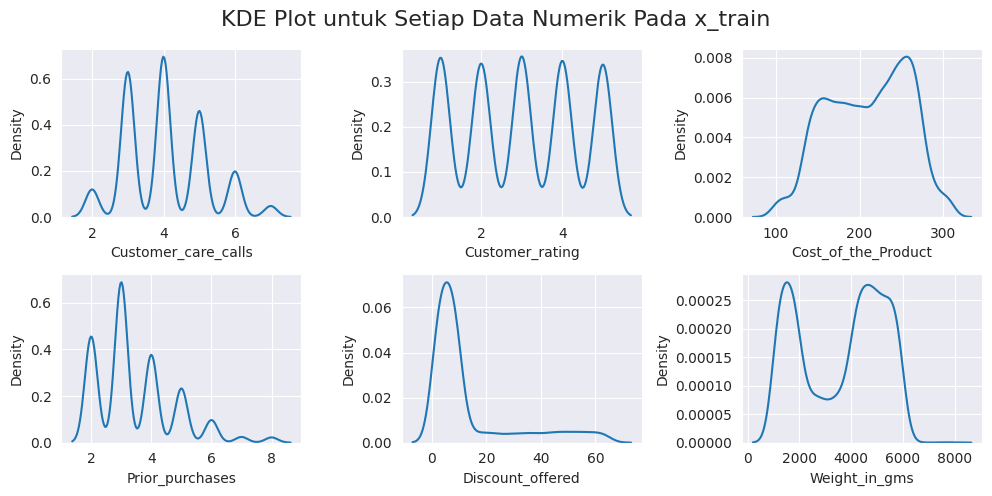

In [40]:
# Tinjau distribusi dari kolom-kolom numerik pada data menggunakan KDEplot dari data yang telah di smoothing
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('KDE Plot untuk Setiap Data Numerik Pada x_train', fontsize=16)

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.kdeplot(x_train_outlier_removed, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

In [41]:
# menghitung derajat skewness dari tiap data numerik
from scipy.stats import skew

skew_score = []                          
for i in nums:
  skew_score.append(round(skew(x_train_outlier_removed[i]),3))

df_skewness = pd.DataFrame({'fitur':nums, 'derajat skewness':skew_score})
df_skewness

,fitur,derajat skewness
0,Customer_care_calls,0.392
1,Customer_rating,0.006
2,Cost_of_the_Product,-0.164
3,Prior_purchases,1.004
4,Discount_offered,1.784
5,Weight_in_gms,-0.235


Setelah meninjau hasil KDEplot dan derajat skewness nya, kolom `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, dan `Weight_in_gms` dapat diasumsikan memiliki distribusi yang normal. Fitur `Prior_purchases` dan `Discount_offered` perlu dinormalisasi untuk meningkatkan performa model terutama pada pembentukan model-model linear/regresi.

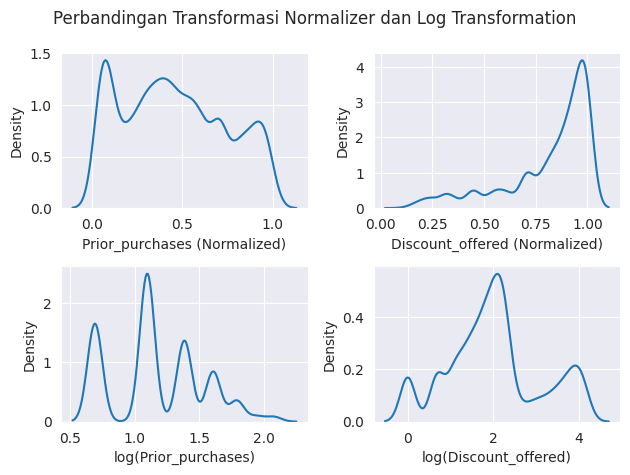

In [42]:
# Lakukan transformasi untuk menormalkan Prior_purchases dan Discount_offered, gunakan Normalizer dan Log Transformation
col = ['Prior_purchases', 'Discount_offered']

prior_purchases_norm = Normalizer()
x_norm = prior_purchases_norm.fit_transform(x_train_outlier_removed[col].values.reshape(len(x_train_outlier_removed),2))
x_log = np.log(x_train_outlier_removed[col])

plt.subplot(2, 2, 1)
sns.kdeplot(x_norm[:,0])
plt.xlabel('Prior_purchases (Normalized)')

plt.subplot(2, 2, 2) 
sns.kdeplot(x_norm[:,1])
plt.xlabel('Discount_offered (Normalized)')

plt.subplot(2, 2, 3) 
sns.kdeplot(x_log['Prior_purchases'])
plt.xlabel('log(Prior_purchases)')

plt.subplot(2, 2, 4) 
sns.kdeplot(x_log['Discount_offered'])
plt.xlabel('log(Discount_offered)')

plt.suptitle('Perbandingan Transformasi Normalizer dan Log Transformation')
plt.tight_layout()
plt.show()

In [43]:
# Periksa skewness setelah transformasi
df_skewness = pd.DataFrame({'fitur':col, 
                            'skewness awal': skew(x_train_outlier_removed[col]),
                            'skewness normalizer': skew(x_norm),
                            'skewness log': skew(x_log)})

df_skewness

,fitur,skewness awal,skewness normalizer,skewness log
0,Prior_purchases,1.003699,0.201736,0.221924
1,Discount_offered,1.783852,-1.381430,0.221275


Dari nilai derajat skewness di atas, dapat dipilih transformasi Normalizer untuk `Prior_purchases` dan Log Transformation untuk `Discount_offered`.


Selanjutnya lakukan juga scaling untuk semua data numerik menggunakan MinMaxScaler. 

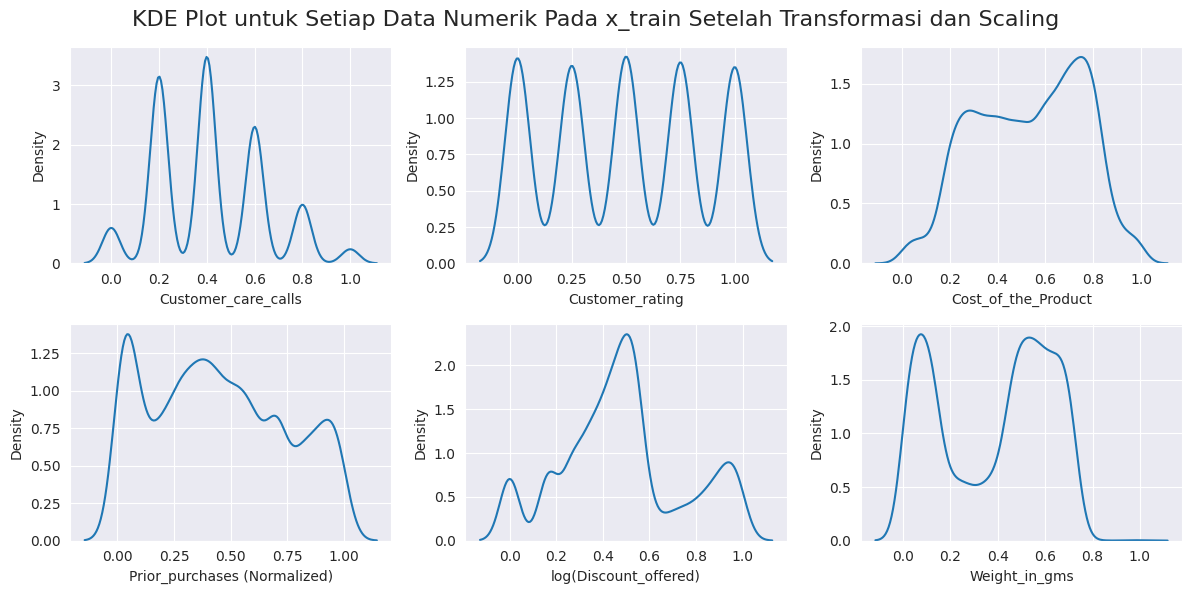

In [44]:
# buat dataset baru dengan fitur yang sudah dinormalisasi dan standarisasi
x_train_transformed = x_train_outlier_removed.copy()
x_train_transformed['Prior_purchases'] = x_norm[:,0]
x_train_transformed['Discount_offered'] = x_log['Discount_offered']
x_train_transformed[nums] = MinMaxScaler().fit_transform(x_train_transformed[nums].values.reshape(x_train_outlier_removed[nums].shape))

# KDEplot data numerik setelah transformasi + scaling
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.kdeplot(x_train_transformed, x=column, ax=ax)
        ax.minorticks_on()
        i += 1

axes[1,0].set_xlabel('Prior_purchases (Normalized)')
axes[1,1].set_xlabel('log(Discount_offered)')
fig.suptitle('KDE Plot untuk Setiap Data Numerik Pada x_train Setelah Transformasi dan Scaling', fontsize=16)
fig.tight_layout(pad=1)
plt.show()

In [45]:
# cek deskriptif dan sebaran data setelah transformasi data
x_train_transformed.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Disc_above_10
count,8648.000000,8648.000000,8648.000000,8648.000000,8648.000000,8648.000000,8648.000000
mean,0.412049,0.496473,0.533979,0.445313,0.479833,0.382126,0.242599
std,0.227329,0.352738,0.224823,0.295951,0.260432,0.239062,0.428680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.345794,0.193626,0.332095,0.121987,0.000000
50%,0.400000,0.500000,0.551402,0.433124,0.466155,0.458145,0.000000
75%,0.600000,0.750000,0.724299,0.703417,0.551598,0.588641,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Berdasarkan pemeriksaan plot dan statistik deskriptif, dapat dilihat bahwa standarisasi dan normalisasi sudah berhasil dilakukan, dimana sebaran data tiap fitur berada pada rentang 0 sampai 1.

Transformasi yang sama akan dilakukan pada data test juga sehingga model yang dibentuk dapat diterapkan kepada data test juga.

### 2.1.3 Feature Encoding

Terdapat beberapa fitur blablabla... (TODO)

In [46]:
# create copy before encoding
x_train_encoded = x_train_transformed.copy()
x_test_encoded = x_test.copy() #harusnya x_test_transformed, tapi belum



# label encoder (for Gender)
gender_encoder = LabelEncoder()
gender_encoder.fit(x_train_encoded['Gender'])

# encode for both train and test, directly replace original feature
x_train_encoded['Gender'] = gender_encoder.transform(x_train_encoded['Gender'])
x_test_encoded['Gender'] = gender_encoder.transform(x_test_encoded['Gender'])



# ordinal encoder (for product importance)
urutan = ['low', 'medium', 'high']
prod_importance_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[urutan])

# fit and transform encoder to the 'Product_importance' column, transform x_test using the same encoder. directly replace old feature
x_train_encoded['Product_importance'] = prod_importance_encoder.fit_transform(x_train_encoded[['Product_importance']])
x_test_encoded['Product_importance'] = prod_importance_encoder.transform(x_test_encoded[['Product_importance']])



# one hot encoder for warehouse, mode of shipment, weight category, and cost category
ohe_list = ['Warehouse_block', 'Mode_of_Shipment', 'Weight_cat', 'Cost_cat']

# create an encoder and fit the dataframe
ohe_encoder = OneHotEncoder(sparse_output=False).fit(x_train_encoded[ohe_list])

# transform train data
train_encoded = ohe_encoder.transform(x_train_encoded[ohe_list])
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_encoder.get_feature_names_out(), index=x_train_encoded.index)

x_train_encoded = pd.concat([x_train_encoded, train_encoded_df], axis=1)

# transform test data
test_encoded = ohe_encoder.transform(x_test_encoded[ohe_list])
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe_encoder.get_feature_names_out(), index=x_test_encoded.index)

x_test_encoded = pd.concat([x_test_encoded, test_encoded_df], axis=1)



# drop unused features after OHE
x_train_encoded.drop(ohe_list, axis=1, inplace=True)
x_test_encoded.drop(ohe_list, axis=1, inplace=True)

In [47]:
# check if columns are same on x train and test after encoding
print(list(x_train_encoded.columns) == list(x_test_encoded.columns))

True


In [48]:
# print columns after encoding
for col in x_train_encoded.columns:
    print(col)

Customer_care_calls
Customer_rating
Cost_of_the_Product
Prior_purchases
Product_importance
Gender
Discount_offered
Weight_in_gms
Disc_above_10
Warehouse_block_A
Warehouse_block_B
Warehouse_block_C
Warehouse_block_D
Warehouse_block_F
Mode_of_Shipment_Flight
Mode_of_Shipment_Road
Mode_of_Shipment_Ship
Weight_cat_heavy
Weight_cat_light
Weight_cat_medium
Weight_cat_very heavy
Cost_cat_high
Cost_cat_low
Cost_cat_medium


Setelah melakukan encoding, beberapa kolom kategorikal pada data train diubah menjadi beberapa kolom untuk mempermudah pembentukan model:
1. `Warehouse_block` diubah menjadi 5 kolom menggunakan One-Hot Encoding
2. `Mode_of_Shipment` diubah menjadi 3 kolom menggunakan One-Hot Encoding
3. `Gender` diubah menjadi kolom binary, dimana 0 = Female dan 1 = Male
4. `Product_importance` diubah menjadi kolom ordinal, dimana 0 = low, 1 = medium, dan 2 = high 
5. `Weight_cat` diubah menjadi 4 kolom menggunakan One-Hot Encoding
6. `Cost_cat` diubah menjadi 3 kolom menggunakan One-Hot Encoding

`Disc_above_10` tidak perlu di-encoding karena sudah berbentuk binary.

Pada metode One Hot Encoding, tidak ada fitur yang di drop karena pengurangan satu fitur hanya perlu dilakukan jika model yang dibentuk adalah model linear untuk menghindari multikolinearitas. Penghapusan fitur dapat dilakukan secara manual pada pembentukan model linear, jika ada.

Transformasi yang sama dilakukan pada data test juga sehingga model yang dibentuk dapat diterapkan kepada data test juga.

### 2.1.4 Handle Class Imbalance

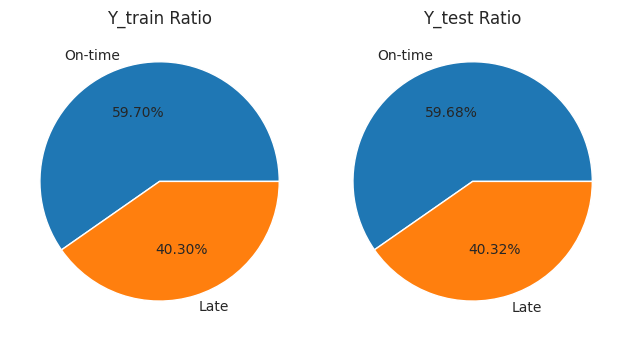

In [49]:
# check ratio on on-time vs late deliveries
plt.subplot(1, 2, 1)
plt.title('Y_train Ratio')
y_train_outlier_removed.value_counts().plot.pie(labels=['On-time', 'Late'], autopct='%.2f%%')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.title('Y_test Ratio')
y_test.value_counts().plot.pie(labels=['On-time', 'Late'], autopct='%.2f%%')
plt.ylabel('')

# Add a title to the whole plot
fig.suptitle('Ratio of Late vs On-time Deliveries for Train and Test Data', fontsize=16, fontweight='bold', y=1.1)

plt.tight_layout(pad=1)
plt.show()

# CATATAN: urutan warna perlu disesuaikan dengan grafik sebelumnya (on-time/1 = orange, late/0= biru)

Pembagian rasio keterlambatan pada data train maupun data test serupa karena sudah dilakukan stratifikasi berdasarkan target pada tahap data splitting, dan penghapusan outlier tidak terlalu berdampak secara signifikan terhadap rasio ini karena jumlah outlier tidak terlalu signifikan dan juga diduga tersebar merata. Rasio yang mendekati 60:40 dinilai masih cukup imbang sehingga tidak perlu dilakukan oversampling untuk menyeimbangkan rasio tersebut.

## 2.2. Feature Engineering

### 2.2.1. Feature Selection

In [50]:
# copy encoded dataframe and add y_train back for feature heatmap
x_train_hm = x_train_encoded.copy()
x_train_hm[target] = y_train_outlier_removed

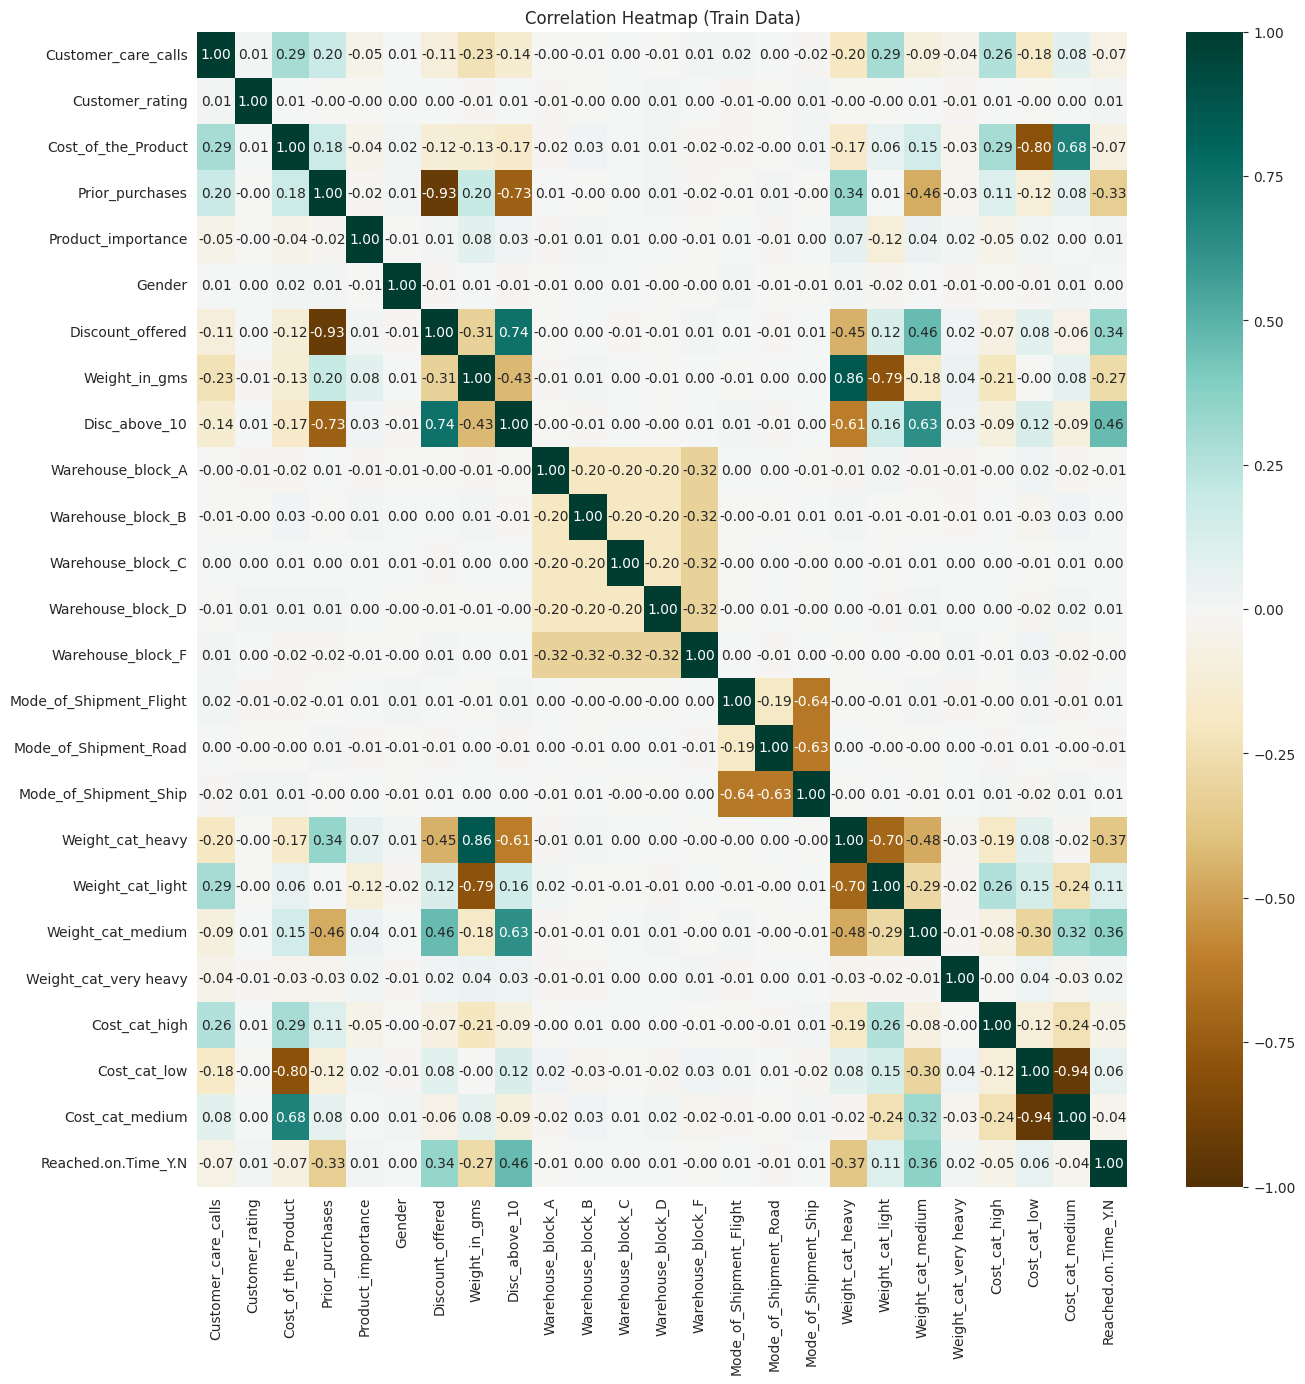

In [51]:
# buat corr dari df x_train_new
plt.figure(figsize=(15, 15))
sns.heatmap(x_train_hm.corr(method='spearman', numeric_only=True), cmap='BrBG', annot=True, vmin=-1, vmax=1, fmt='.2f')

plt.title('Correlation Heatmap (Train Data)')
plt.show()

Setelah dilakukan pemeriksaan ulang korelasi antar fitur, ditemukan bahwa terdapat enam fitur yang memiliki korelasi yang cukup kuat terhadap target, yaitu:
1. `Prior_purchases`, dengan koefisien -0.33
2. `Discount_offered`, dengan koefisien 0.34
3. `Weight_in_gms`, dengan koefisien -0.27
4. `Disc_above_10`, dengan koefisien 0.46
5. `Weight_cat_heavy`, dengan koefisien -0.37, dan
6. `Weight_cat_medium`, dengan koefisien 0.36

`Customer_rating`, `Warehouse_block`, `Mode_of_shipment`, dan `gender` memiliki korelasi yang sangat rendah terhadap semua fitur (kecuali fitur One-Hot pasangannya), sehingga diduga aman untuk di-drop atau tidak digunakan dalam model karena tidak akan mempengaruhi model secara signifikan.

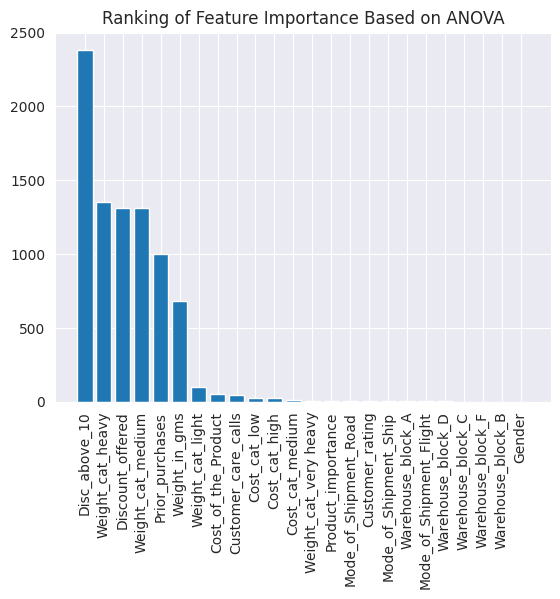

In [52]:
# using ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k='all')
kbest_fit = selector.fit_transform(x_train_encoded, y_train_outlier_removed)

columns = x_train_encoded.columns

feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(len(columns)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores[i])[1])

plt.bar(col_list,num_list)
plt.xticks(rotation=90)
plt.title('Ranking of Feature Importance Based on ANOVA')

plt.show()

Berdasarkan nilai ANOVA fitur terhadap target, dapat diambil kesimpulan yang serupa dengan hasil uji korelasi; bahwa terdapat 6 fitur yang memiliki hubungan yang mendominasi terhadap target, dengan satu fitur (`Disc_above_10`) mendominasi fitur lainnya. 

Tanpa memilih terlebih dahulu jumlah fitur yang akan dipilih nantinya saat pembentukan model, secara garis besar pemilihan jumlah fitur dapat dibagi menjadi dua:

1. Menggunakan enam fitur, seperti yang disebutkan pada uji korelasi, yaitu:
    - `Disc_above_10`
    - `Weight_cat_heavy`
    - `Discount_offered`
    - `Weight_cat_medium`
    - `Prior_purchases`, dan
    - `Weight_in_gms`
2. Menggunakan dua belas fitur, dengan menyertakan enam fitur di atas ditambah empat fitur yang masih memiliki sedikit pengaruh/korelasi dengan target seperti yang terlihat pada grafik di atas, yaitu:
    - `Weight_cat_light`
    - `Cost_of_the_Product`
    - `Customer_care_calls`
    - `Cost_cat_low`
    - `Cost_cat_high`
    - `Cost_cat_medium`

Perlu diingat bahwa untuk model linear, fitur yang memiliki multikolinearitas tinggi perlu ditangani terlebih dahulu.

### 2.2.2. Feature Extraction

Berdasarkan temuan pada bagian Feature Selection, terdapat beberapa fitur yang memiliki korelasi cukup kuat dengan fitur lainnya dan dapat digabung menjadi satu fitur baru, atau salah satu fitur dapat di drop, jika model yang akan dibentuk adalah model linear untuk menghindari multikolinearitas. Namun langkah ini dapat dilewati jika model yang dibentuk merupakan model non-linear, sehingga bersifat opsional.

Mengacu pada bagian 1.3 (Multivariate Analysis), beberapa fitur kategori baru sudah dibentuk berdasarkan `Weight_in_gms`, `Cost_of_the_Product`, dan `Discount_offered`. Adapun beberapa fitur tersebut sudah di proses dengan Feature Encoding pada bagian 2.1.3, kecuali untuk fitur `Disc_above_10` yang sudah merupakan fitur binary.

## 2.3. Preprocessing Pipeline
Sebagai upaya untuk simplifikasi tahapan preprocessing, sebuah pipeline dapat dibentuk dari tiap-tiap langkah yang sudah dilakukan di atas.

Adapun data train yang masuk ke dalam pipeline diasumsikan sudah melewati proses pada 2.1.1 (handling missing values, duplicated data, dan outliers) sehingga proses tersebut tidak perlu dimasukkan sebagai bagian dari pipeline.

Dengan demikian, pipeline akan menggunakan data `x_train_outlier_removed` dan `y_train_outlier_removed`, dan akan menangani proses:
1. Feature Transformation
2. Feature Encoding

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Feature Transformation
# for Prior_purchases, use Normalizer and MinMaxScaler
pp_transformer = Pipeline(
    steps=[
        ("normalizer", Normalizer()), 
        ("scaler", MinMaxScaler())
    ]
)

# for Discount_offered, use log transformation and MinMaxScaler
dsc_transformer = Pipeline(
    steps=[
        ("logtransformer", FunctionTransformer(np.log)),
        ("scaler", MinMaxScaler()),
    ]
)

# for all other numerical features, apply MinMaxScaler
other_nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms']
other_nums_transformer = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
    ]
)

## Feature Encoding
# for Gender, use LabelEncoder
gender_transformer = Pipeline(
    steps=[
        ("encoder", LabelEncoder()),
    ]
)

# for Product_importance, use OrdinalEncoder
urutan = ['low', 'medium', 'high']
pi_transformer = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[urutan])),
    ]
)

# use OneHotEncoder for Warehouse_block, Mode_of_shipment, Weight_cat, and Cost_cat
# for Gender, since LabelEncoder cannot be used in column transformer, also use OneHotEncoder, but add the parameter drop='if_binary'
ohe_list = ['Gender', 'Warehouse_block', 'Mode_of_Shipment', 'Weight_cat', 'Cost_cat']
ohe_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
    ]
)

# finalize column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("pp", pp_transformer, ['Prior_purchases']),
        ("dsc", dsc_transformer, ['Discount_offered']),
        ("othernums", other_nums_transformer, other_nums),
        ("pi", pi_transformer, ['Product_importance']),
        ("ohe", ohe_transformer, ohe_list),
    ]
)

# 3. Machine Learning Modelling & Evaluation

Test Decision Tree with Pipeline

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# test pipeline using decision tree
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor), 
        ('classifier', DecisionTreeClassifier())
    ]
)

clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pp',
                                                  Pipeline(steps=[('normalizer',
                                                                   Normalizer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Prior_purchases']),
                                                 ('dsc',
                                                  Pipeline(steps=[('logtransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Discount_offered']),
                                                 ('othernums',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())])...
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Product_importance']),
                                                 ('ohe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Weight_cat',
                                                   'Cost_cat'])])),
                ('classifier', DecisionTreeClassifier())])

In [55]:
clf.fit(x_train_outlier_removed, y_train_outlier_removed)
print('model score: %.3f' % clf.score(x_train_outlier_removed, y_train_outlier_removed))
print('model score: %.3f' % clf.score(x_test, y_test))

model score: 1.000
model score: 0.654


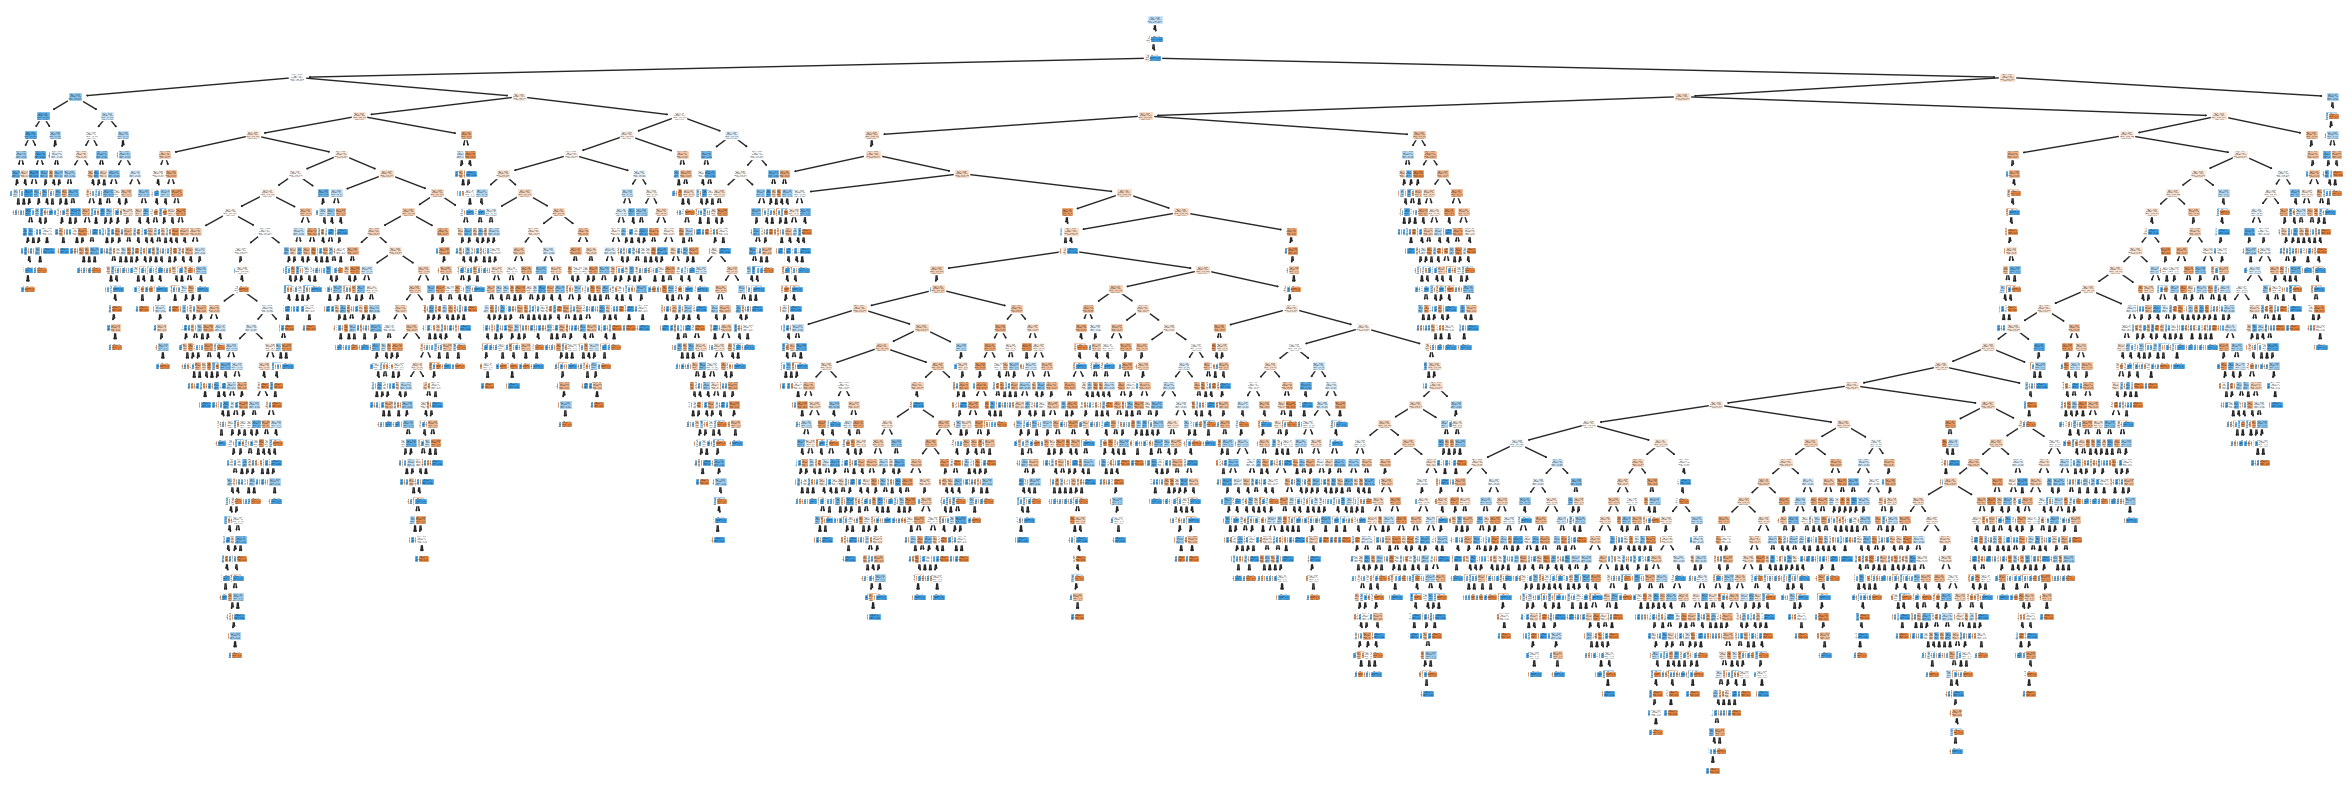

In [56]:
fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(clf['classifier'], class_names=['Late', 'On-time'], filled=True)

plt.show()

## 3.1. Decision Tree (with grid search) - Mezky

In [57]:
# hyperparameters for grid search
param_grid = {
    'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8],
    'classifier__min_samples_split': [2, 3, 4, 5],
    'classifier__min_samples_leaf': [1, 2, 3, 4]
}

# grid search
gs = GridSearchCV(clf, param_grid, cv=5)
gs.fit(x_train_outlier_removed, y_train_outlier_removed)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pp',
                                                                         Pipeline(steps=[('normalizer',
                                                                                          Normalizer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Prior_purchases']),
                                                                        ('dsc',
                                                                         Pipeline(steps=[('logtransformer',
                                                                                          FunctionTransformer(func=<ufunc 'log'>)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Discount_offered']),
                                                                        ('othernums',
                                                                         Pipeline(steps=...
                                                                         ['Product_importance']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Warehouse_block',
                                                                          'Mode_of_Shipment',
                                                                          'Weight_cat',
                                                                          'Cost_cat'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'classifier__min_samples_leaf': [1, 2, 3, 4],
                         'classifier__min_samples_split': [2, 3, 4, 5]})

In [58]:
print(gs.best_params_)

{'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


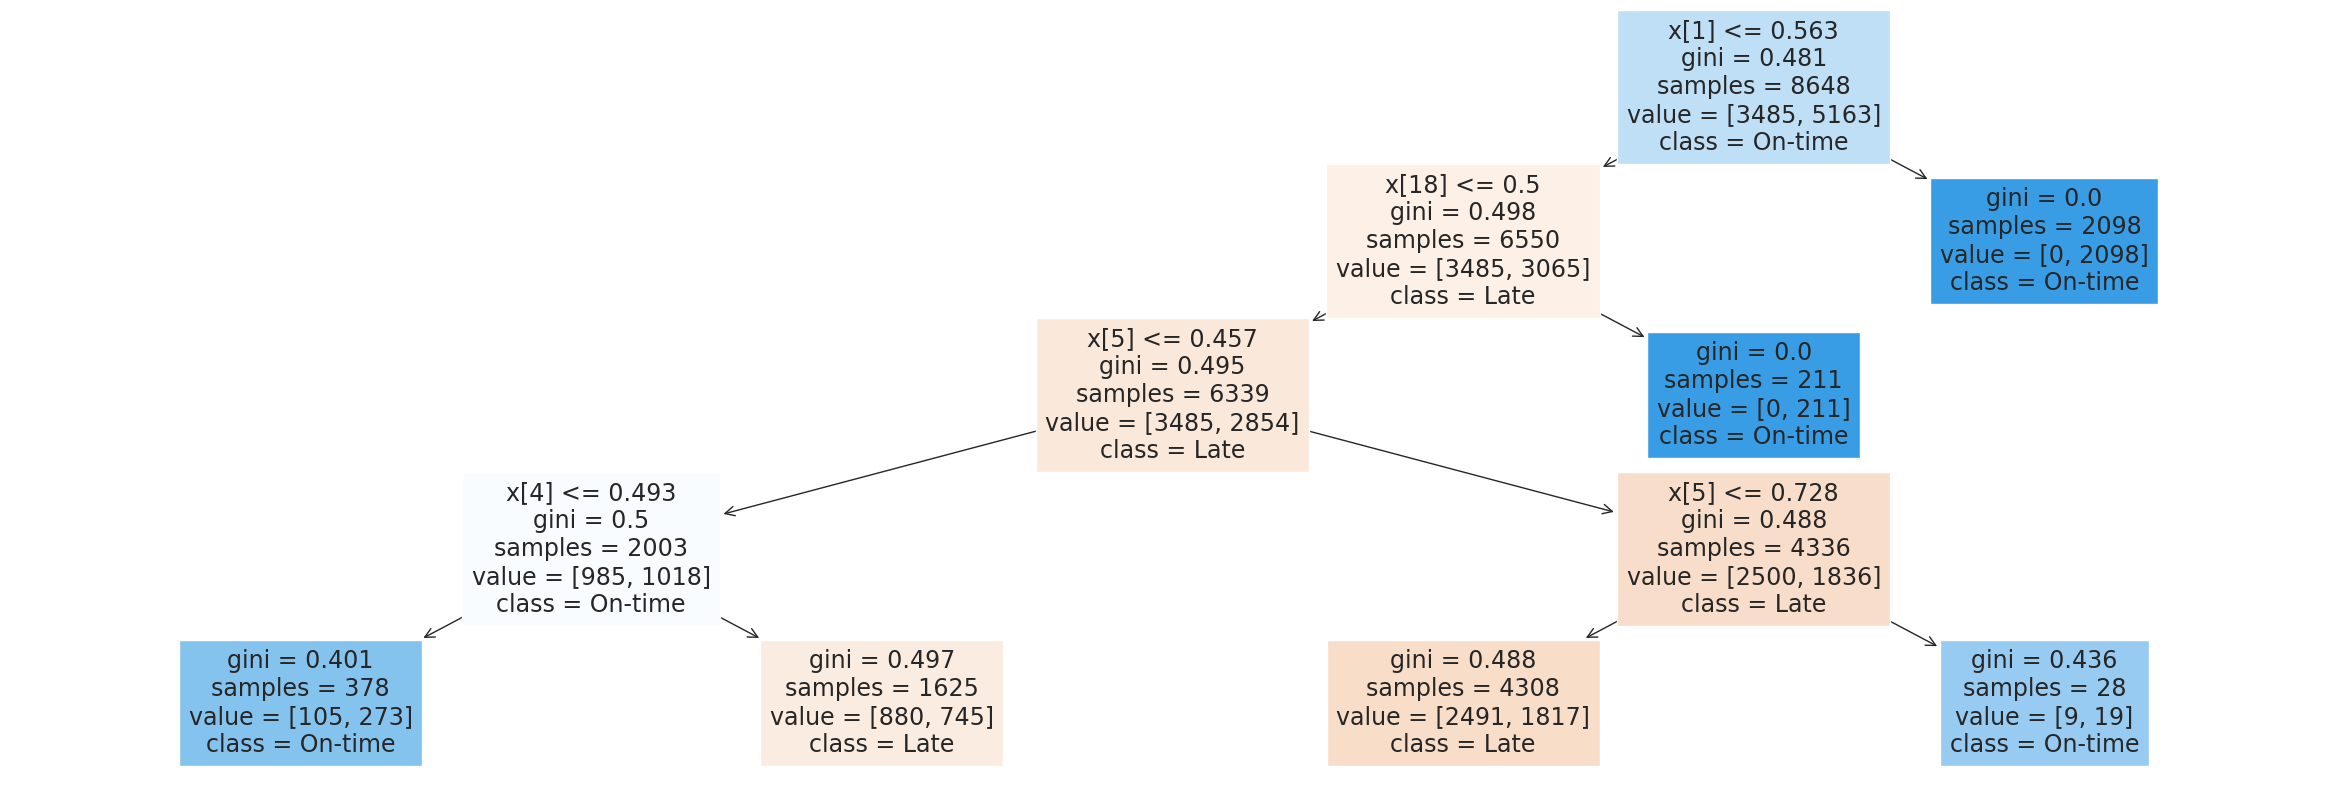

In [59]:
# create decision tree with best parameters and visualize using plot tree
best_dtree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=random_state)

best_dtree_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor), 
        ('classifier', best_dtree)
    ]
)

best_dtree_clf.fit(x_train_outlier_removed, y_train_outlier_removed)

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(best_dtree_clf['classifier'], class_names=['Late', 'On-time'], filled=True)

plt.show()

In [60]:
print('model score: %.3f' % best_dtree_clf.score(x_train_outlier_removed, y_train_outlier_removed))
print('model score: %.3f' % best_dtree_clf.score(x_test, y_test))

model score: 0.691
model score: 0.676


In [61]:
# # using graphviz
# import graphviz 

# dot_data = tree.export_graphviz(best_dtree, out_file=None, feature_names=selected_features, class_names=['Late', 'On-time'], filled=True, rounded=True, special_characters=True) 

# graph = graphviz.Source(dot_data) 
# graph

## 3.1.1 Cross Validation

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [74]:
models = [
    ['Decision Tree', DecisionTreeClassifier()],
    ['Random Forest', RandomForestClassifier()],
    ['Logistic Regression', LogisticRegression()],
    ['KNN', KNeighborsClassifier()],
    ['XGBoost', XGBClassifier()]
]

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate

def cross_validation(model):
    model_name = []

    cv_accuracy_mean = []
    cv_accuracy_std = []
    training_accuracy = []

    cv_precision_mean = []
    cv_precision_std = []
    training_precision = []

    cv_recall_mean = []
    cv_recall_std = []
    training_recall = []
    for name, model in models:
    
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ]) 
        model_name.append(name)

        #scoring
        scoring= ['accuracy', 'precision', 'recall']

        # test
        cv_score = cross_validate(pipeline, x_train_outlier_removed, y_train_outlier_removed, scoring=scoring, cv=10, n_jobs=-1)

        cv_accuracy_mean.append(cv_score['test_accuracy'].mean())
        cv_accuracy_std.append(cv_score['test_accuracy'].std())

        cv_precision_mean.append(abs(cv_score['test_precision']).mean())
        cv_precision_std.append(abs(cv_score['test_precision']).std())

        cv_recall_mean.append(abs(cv_score['test_recall']).mean())
        cv_recall_std.append(abs(cv_score['test_recall']).std())

        # training
        pipeline.fit(x_train_outlier_removed, y_train_outlier_removed)
        y_pred = pipeline.predict(x_train_outlier_removed)
        training_accuracy.append(accuracy_score(y_train_outlier_removed, y_pred))
        training_precision.append(precision_score(y_train_outlier_removed, y_pred))
        training_recall.append(recall_score(y_train_outlier_removed, y_pred))
    
    return pd.DataFrame({
        'Model': model_name,
        'Training Accuracy': training_accuracy,
        'CV Accuracy (mean)': cv_accuracy_mean,
        'CV Accuracy (std)' : cv_accuracy_std,
        'Training Precision' : training_precision,
        'CV Precision (mean)': cv_precision_mean,
        'CV Precision (std)': cv_precision_std,
        'Training Recall' : training_recall,
        'CV Recall (mean)' : cv_recall_mean,
        'CV Recall (std)' : cv_recall_std
    })

In [78]:
cv_result = cross_validation(models)
cv_result

,Model,Training Accuracy,CV Accuracy (mean),CV Accuracy (std),Training Precision,CV Precision (mean),CV Precision (std),Training Recall,CV Recall (mean),CV Recall (std)
0,Decision Tree,1.000000,0.648936,0.015029,1.000000,0.703286,0.011651,1.000000,0.712772,0.021497
1,Random Forest,1.000000,0.653677,0.016647,1.000000,0.753545,0.011914,1.000000,0.623877,0.027528
2,Logistic Regression,0.654255,0.651712,0.012234,0.731219,0.728994,0.013486,0.665505,0.663774,0.022389
3,KNN,0.775671,0.645933,0.015892,0.834822,0.717377,0.014799,0.778230,0.671906,0.024164
4,XGBoost,0.891304,0.651248,0.014945,0.949925,0.734680,0.011710,0.863451,0.650985,0.024796


Random Forest (with GridSearch) - Rima

In [66]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# import warnings
# warnings.filterwarnings('ignore')

# num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
# rf = RandomForestClassifier(random_state=42)

# #hyperparameters
# param = {
#     'n_estimators': [100, 200],
#     'max_depth': [2, 5, 10],
#     'max_features': ['sqrt', 'log2', 'auto'],
#     'criterion': ['gini', 'entropy']
# }

# rfg = GridSearchCV(rf, param, cv=5)
# rfg.fit(x_train[num], y_train)
    
# #best hyperparameters
# print(rfg.best_params_)

In [67]:
# # Inisialisasi Model
# rfc = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
# rfc.fit(x_train[num], y_train)
# eval_classification(rfc)

Logistic Regression (With Random Search) - Syafiq (In Progress)

In [68]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RandomizedSearchCV

# num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
# lr = LogisticRegression (random_state=42)

# #hyperparameters
# param = {
#     'penalty': ['l2', 'l1'],
#     'max_iter': [100],
#     'solver': ['lbfgs'],
#     'C': [float(x) for x in np.linspace(0.0001, 1, 100)]
# }

# lrr = RandomizedSearchCV(lr, param, cv=5)
# lrr.fit(x_train[num], y_train)
    
# #best hyperparameters
# print(lrr.best_params_)

In [69]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# #from sklearn.model_selection import cross_validate

# num = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# def eval_classification(model):
#     y_pred = model.predict(x_test[num])
#     y_pred_train = model.predict(x_train[num])
#     y_pred_proba = model.predict_proba(x_test[num])
#     y_pred_proba_train = model.predict_proba(x_train[num])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [70]:
# from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
# lr = LogisticRegression() # inisiasi object dengan nama logreg
# lr.fit(x_train[num], y_train) # fit model regression dari data train
# eval_classification(lr)

In [71]:
# from sklearn.model_selection import RandomizedSearchCV

# penalty = ['l2']
# C = [float(x) for x in np.linspace(0.001, 1, 100)]
# hyperparameters = dict(penalty=penalty, C=C)

# lr = LogisticRegression()
# rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=100)
# rs.fit(x_train[num], y_train)
# eval_classification(rs)

In [72]:
# show_best_hyperparameter(rs)